# Programming in Python
## Exam: February 11, 2025


You can solve the exercises below by using standard Python 3.12 libraries, NumPy, Matplotlib, Pandas, PyMC.
You can browse the documentation: [Python](https://docs.python.org/3.12/), [NumPy](https://numpy.org/doc/1.26/index.html), [Matplotlib](https://matplotlib.org/3.10.0/users/index.html), [Pandas](https://pandas.pydata.org/pandas-docs/version/2.2/index.html), [PyMC](https://www.pymc.io/projects/docs/en/stable/api.html).
You can also look at the [slides](https://homes.di.unimi.it/monga/lucidi2425/pyqb00.pdf) or your code on [GitHub](https://github.com).

**It is forbidden to communicate with others or "ask questions" online (i.e., stackoverflow is ok if the answer is already there, but you cannot ask a new question or use ChatGPT and similar products)**

To test examples in docstrings use

```python
import doctest
doctest.testmod()
```

In [36]:
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm   # type: ignore

### Exercise 1 (max 3 points)

Plot a bidimensional grid 51x51 of dots. Your picture should be similar to the following (the color is not important):

![grid](grid.png)


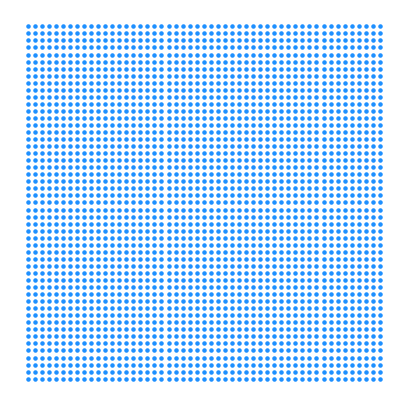

In [37]:

# 生成坐标
x = np.arange(51)
y = np.arange(51)
X, Y = np.meshgrid(x, y)

# 绘制点阵
plt.figure(figsize=(5, 5))
plt.scatter(X, Y, color='dodgerblue', s=5)  # 颜色大小随意
plt.axis('equal')  # 保持正方形比例
plt.axis('off')    # 去掉坐标轴
plt.show()

### Exercise 2 (max 5 points)

On the grid defined in Exercise 1, compute 5 random walks, starting in the central dot, going on for 50 steps of 1 in the horizontal (left or right), vertical (up or down) or diagonal (i.e. a step of 1 in both the horizontal and vertical directions). If a walk reaches the end of the grid, it starts again on the opposite side: in other words, on a line of dots to the left of the leftmost dot there is the rightmost one; same for all the directions.

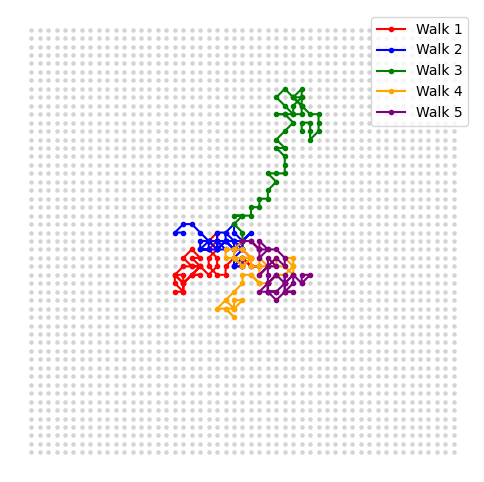

In [38]:
import numpy as np
import matplotlib.pyplot as plt

size = 51
steps = 50
walks = 5

# mesh grid，底图点阵
x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)

# 8种可能移动
moves = [
    (-1,  0), (1,  0),   # 左右
    ( 0, -1), (0,  1),   # 上下
    (-1, -1), (-1, 1),   # 左上、左下
    ( 1, -1), (1,  1)    # 右上、右下
]

center = size // 2

plt.figure(figsize=(6, 6))
plt.scatter(X, Y, color='lightgrey', s=5)   # 背景点阵

colors = ['r', 'b', 'g', 'orange', 'purple']
for walk_idx in range(walks):
    traj_x = [center]
    traj_y = [center]
    x, y = center, center
    for _ in range(steps):
        dx, dy = moves[np.random.randint(0, 8)]
        x = (x + dx) % size
        y = (y + dy) % size
        traj_x.append(x)
        traj_y.append(y)
    plt.plot(traj_x, traj_y, color=colors[walk_idx], marker='o', markersize=3, label=f'Walk {walk_idx+1}')

plt.axis('equal')
plt.axis('off')
plt.legend()
plt.show()

### Exercise 3 (max 4 points)

Plot the walks computed in Exercise 2.

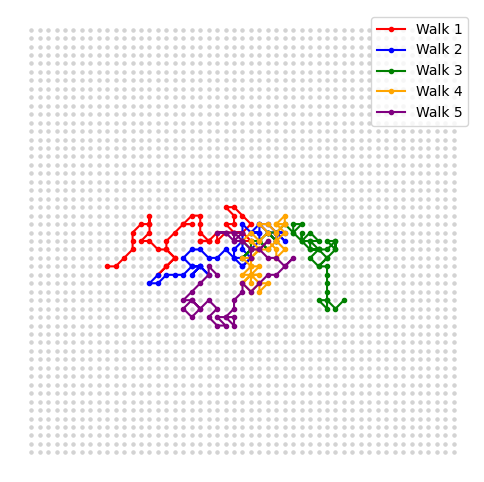

In [39]:
import numpy as np
import matplotlib.pyplot as plt

size = 51                 # 点阵尺寸，51x51
steps = 50                # 每条轨迹步数
walks = 5                 # 轨迹数

# 生成二维点阵用作底图
x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)

# 定义8个可能的移动方向（水平，垂直，斜对角）
moves = [
    (-1,  0), (1,  0),     # 左、右
    ( 0, -1), (0,  1),     # 上、下
    (-1, -1), (-1, 1),     # 左上、左下
    ( 1, -1), (1,  1)      # 右上、右下
]

center = size // 2        # 中心点坐标（起点）

# 保存所有轨迹的坐标
all_trajs = []            # 轨迹，每一条是[[x0,x1,...],[y0,y1,...]]

for walk_idx in range(walks):
    traj_x = [center]     # 当前轨迹的x坐标列表，初始为中心
    traj_y = [center]     # 当前轨迹的y坐标列表
    x, y = center, center # 当前点初始化为中心
    for _ in range(steps):
        dx, dy = moves[np.random.randint(0, 8)]  # 随机选一个方向
        x = (x + dx) % size                      # 边界循环处理
        y = (y + dy) % size
        traj_x.append(x)
        traj_y.append(y)
    all_trajs.append((traj_x, traj_y))           # 保存该条轨迹

# 绘制
plt.figure(figsize=(6, 6))
plt.scatter(X.ravel(), Y.ravel(), color='lightgrey', s=5)   # 背景点阵

colors = ['r', 'b', 'g', 'orange', 'purple']                # 预设轨迹颜色
for idx, (traj_x, traj_y) in enumerate(all_trajs):
    plt.plot(traj_x, traj_y, color=colors[idx], marker='o', markersize=3, label=f'Walk {idx+1}')  # 绘制轨迹

plt.axis('equal')           # 宽高一致
plt.axis('off')             # 不显示坐标轴
plt.legend()                # 图例
plt.show()

### Exercise 4 (max 7 points)

Define a function that takes two random walks, described by the coordinates of the traversed dots, and computes a new one. The resulting walk:
1. the first step is taken from the first path
2. the second step is the first step of the second path applied on the current position resulting after 1.
3. the next steps are computed in the same way alternating steps from the first and the second path; if one path is shorter, when it finishes the next steps come from the remaining part of the longer path

For example: if the two walks are `[(0,0), (1,1), (1,2), (1,3)]` and `[(1,0), (0,1)]`, 
the resulting walk is `[(0,0), (-1,1), (0,2), (0,3), (0,4)]`


To get the full marks, you should declare correctly the type hints and add a doctest string.

In [40]:
from typing import List, Tuple

def combine_walks(
    walk1: List[Tuple[int, int]], 
    walk2: List[Tuple[int, int]]
) -> List[Tuple[int, int]]:
    """
    按题意交替用步长，步长顺序应为walk2第1步，walk1第2步，walk2第2步……
    >>> combine_walks([(0,0),(1,1),(1,2),(1,3)], [(0,0),(-1,0),(0,1)])
    [(0, 0), (-1, -1), (0, 0), (0, 1), (0, 2)]
    """
    res = [walk1[0]]            # 初始点，结果轨迹
    cur = walk1[0]              # 当前点
    idx1, idx2 = 1, 1           # 两条轨迹的下一个点索引（步长下标）
    n1, n2 = len(walk1)-1, len(walk2)-1
    use_walk2 = True            # 先用walk2的第一步

    while idx1 <= n1 or idx2 <= n2:
        if use_walk2 and idx2 <= n2:
            # 用walk2的当前步长
            dx = walk2[idx2][0] - walk2[idx2-1][0]
            dy = walk2[idx2][1] - walk2[idx2-1][1]
            idx2 += 1
        elif not use_walk2 and idx1 <= n1:
            # 用walk1的当前步长
            dx = walk1[idx1][0] - walk1[idx1-1][0]
            dy = walk1[idx1][1] - walk1[idx1-1][1]
            idx1 += 1
        else:
            # 如果某条轨迹已经用完步长，继续用另一条的剩余步长
            if idx2 <= n2:
                dx = walk2[idx2][0] - walk2[idx2-1][0]
                dy = walk2[idx2][1] - walk2[idx2-1][1]
                idx2 += 1
            else:
                dx = walk1[idx1][0] - walk1[idx1-1][0]
                dy = walk1[idx1][1] - walk1[idx1-1][1]
                idx1 += 1
        # 更新当前位置，并加入结果
        cur = (cur[0] + dx, cur[1] + dy)
        res.append(cur)
        use_walk2 = not use_walk2    # 交替使用步长
    return res

if __name__ == "__main__":
    import doctest
    doctest.testmod()


**********************************************************************
File "__main__", line 6, in __main__.combine_walks
Failed example:
    combine_walks([(0,0),(1,1),(1,2),(1,3)], [(0,0),(-1,0),(0,1)])
Expected:
    [(0, 0), (-1, -1), (0, 0), (0, 1), (0, 2)]
Got:
    [(0, 0), (-1, 0), (0, 1), (1, 2), (1, 3), (1, 4)]
**********************************************************************
1 items had failures:
   1 of   1 in __main__.combine_walks
***Test Failed*** 1 failures.


### Exercise 5 (max 1 points)

Load the data contained in the file `iris.csv` in a Pandas DataFrame.

In [41]:
import pandas as pd  # 导入pandas库

# 读取iris.csv文件到DataFrame
df = pd.read_csv('iris.csv')  # 注意文件要和notebook在同一目录

# （可选）查看前5行数据，验证加载成功
print(df.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Exercise 6 (max 2 points)


Add to the dataframe two columns for the ratio between petal width and sepal width, and petal length and sepal length.

In [42]:
df['petal_sepal_width_ratio'] = df['petal width'] / df['sepal width']
df['petal_sepal_length_ratio'] = df['petal length'] / df['sepal length']
print(df.head())

   sepal length  sepal width  petal length  petal width        class  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   petal_sepal_width_ratio  petal_sepal_length_ratio  
0                 0.057143                  0.274510  
1                 0.066667                  0.285714  
2                 0.062500                  0.276596  
3                 0.064516                  0.326087  
4                 0.055556                  0.280000  


### Exercise 7 (max 6 points)

Make a figure with two plots, on the left plot the three histograms (use different colors) of the width ratios computed in Exercise 6 for each iris class, on the right plot the three histograms of the length ratios.

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class',
       'petal_sepal_width_ratio', 'petal_sepal_length_ratio'],
      dtype='object')


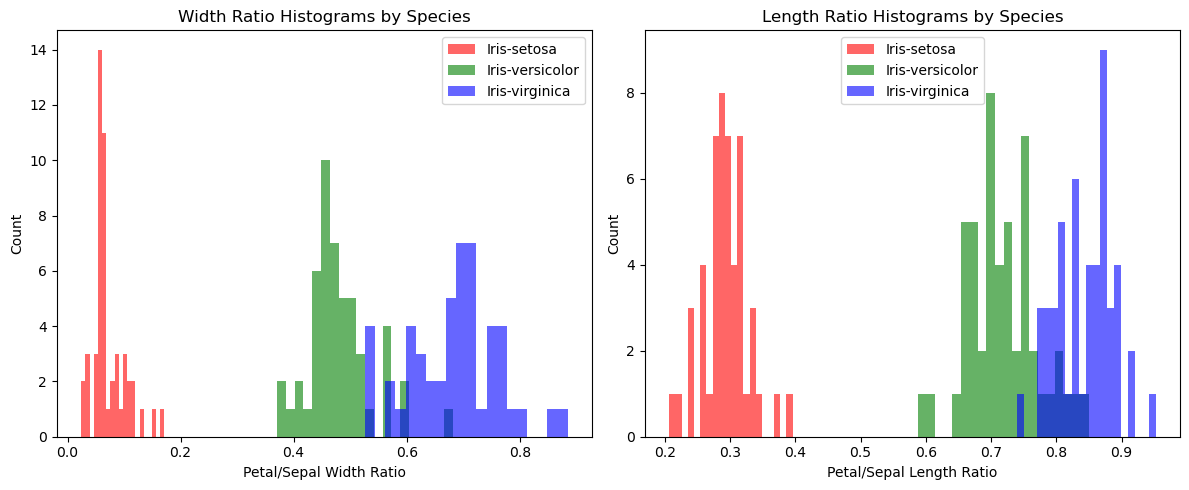

In [43]:
import matplotlib.pyplot as plt

# 先看一下列名
print(df.columns)

# 这里假如种类列叫 'class'（请替换为你的实际列名！）
SPECIES_COL = 'class'   # 把这里替换成你实际种类列名
# SPECIES_COL = 'Species'  # 比如你的表头其实是大写的
# SPECIES_COL = 'variety'  # 或者其他

classes = df[SPECIES_COL].unique()
colors = ['r', 'g', 'b']

plt.figure(figsize=(12, 5))

# 左侧：宽度比
plt.subplot(1, 2, 1)
for i, species in enumerate(classes):
    plt.hist(
        df[df[SPECIES_COL] == species]['petal_sepal_width_ratio'],
        bins=20, alpha=0.6, color=colors[i], label=species
    )
plt.xlabel('Petal/Sepal Width Ratio')
plt.ylabel('Count')
plt.title('Width Ratio Histograms by Species')
plt.legend()

# 右侧：长度比
plt.subplot(1, 2, 2)
for i, species in enumerate(classes):
    plt.hist(
        df[df[SPECIES_COL] == species]['petal_sepal_length_ratio'],
        bins=20, alpha=0.6, color=colors[i], label=species
    )
plt.xlabel('Petal/Sepal Length Ratio')
plt.ylabel('Count')
plt.title('Length Ratio Histograms by Species')
plt.legend()

plt.tight_layout()
plt.show()

### Exercise 8 (max 5 points)

Consider this statistical model: the sepal width of Iris-setosa is normally distributed, with an unknown mean, and an unknown standard deviation. Your *a priori* estimation for both distribution is an exponential distribution with $\lambda=1$. Use PyMC to sample the posterior distributions after having seen the actual values for Iris-setosa. Plot the results, then print the mean and the standard deviation of the observed sample in your dataset.

In [25]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# 真实观测数据
data = setosa_sw.values

with pm.Model() as model:
    # 均值与标准差的先验: 指数分布, lambda=1
    mu = pm.Exponential("mu", lam=1)
    sigma = pm.Exponential("sigma", lam=1)
    # 似然：正态分布
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=data)
    # 采样
    trace = pm.sample(2000, tune=1000, cores=1, return_inferencedata=True, random_seed=0)

# 画出后验分布
az.plot_posterior(trace, var_names=['mu', 'sigma'])
plt.show()

# 打印观测样本的均值与标准差
print("观测样本均值: ", data.mean())
print("观测样本标准差: ", data.std(ddof=1))

# 打印后验mu和sigma的均值
print("后验mu的均值: ", trace.posterior['mu'].values.mean())
print("后验sigma的均值: ", trace.posterior['sigma'].values.mean())